Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_level']
Using target column: income_level
Accuracy with 10 estimators: 0.8257
Best accuracy of 0.8344 achieved with 190 estimators.


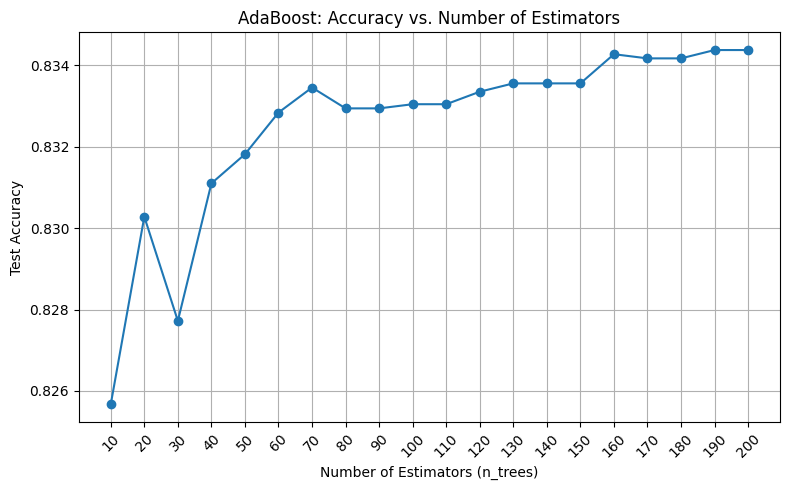

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('income.csv')

# 2. See what columns we actually have
print("Columns:", list(df.columns))

# 3. Basic cleaning: drop missing values (if represented as '?')
df = df.replace(' ?', np.nan).dropna().reset_index(drop=True)

# 4. Automatically treat the last column as the target
target_col = df.columns[-1]
print("Using target column:", target_col)

X = df.iloc[:, :-1]   # all except last
y = df.iloc[:,  -1]   # just last

# 5. Encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Part (i): AdaBoost with n_estimators = 10
model_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
acc_10 = accuracy_score(y_test, y_pred_10)
print(f"Accuracy with 10 estimators: {acc_10:.4f}")

# 8. Part (ii): Fine‐tune number of trees
n_list = list(range(10, 201, 10))
accuracies = []

for n in n_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Find best
best_idx = int(np.argmax(accuracies))
best_n = n_list[best_idx]
best_acc = accuracies[best_idx]
print(f"Best accuracy of {best_acc:.4f} achieved with {best_n} estimators.")

# 9. Plotting
plt.figure(figsize=(8,5))
plt.plot(n_list, accuracies, marker='o')
plt.title('AdaBoost: Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_trees)')
plt.ylabel('Test Accuracy')
plt.xticks(n_list, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix

# (Assuming you’ve already run the sweep and have best_n and best_acc, plus X_train, X_test, y_train, y_test.)

# 1. Re-train the best model
best_model = AdaBoostClassifier(n_estimators=best_n, random_state=42)
best_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_best = best_model.predict(X_test)

# 3. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

print(f"Best accuracy: {best_acc:.4f}")
print(f"Number of trees: {best_n}")
print("Confusion matrix:")
print(cm)


Best accuracy: 0.8344
Number of trees: 190
Confusion matrix:
[[7133  298]
 [1320 1018]]
